### The convection diffusion equation

In [1]:
import functools as ft
import logging

import numpy as np
from scipy.signal import gaussian

import pylab as pl

from triflow import Model, Simulation, schemes, displays

pl.style.use('seaborn-white')

%matplotlib inline

The convection–diffusion equation is a combination of the diffusion and convection (advection) equations, and describes physical phenomena where particles, energy, or other physical quantities are transferred inside a physical system due to two processes: diffusion and convection. ([Wikipedia](https://en.wikipedia.org/wiki/Convection%E2%80%93diffusion_equation))

The equation reads

$$\partial_{t}U = k \partial_{xx} U - c \partial_{x} U$$

with

- $U$ the physical quantities transferred (it could be a chemical species concentration, the temperature of a fluid...)
- $k$ a diffusion convection
- $c$ a velocity, which will be constant in our example.


In [2]:
model = Model("k * dxxU - c * dxU",
              "U", ["k", "c"])

We discretize our spatial domain. `retstep=True` ask to return the spatial step. We want periodic condition,
so `endpoint=True` exclude the final node (which will be redondant with the
first node, $x=0$ and $x=100$ are merged)

In [6]:
x, dx = np.linspace(0, 100, 500, retstep=True, endpoint=False)

We initialize with three gaussian pulses for the initial condition

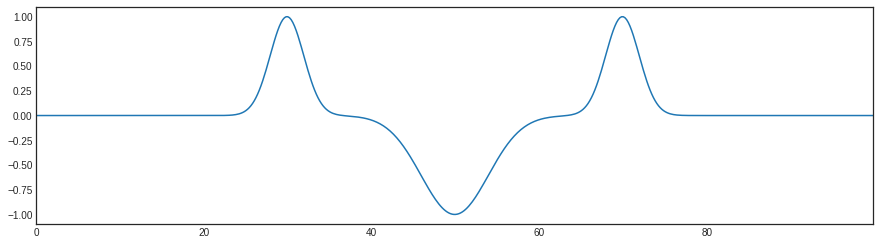

In [7]:
U = (np.roll(gaussian(x.size, 10), x.size // 5) +
     np.roll(gaussian(x.size, 10), -x.size // 5) -
     gaussian(x.size, 20))

fields = model.fields_template(x=x, U=U)

pl.figure(figsize=(15, 4))
pl.plot(fields.x, fields.U)
pl.xlim(0, fields.x.max())
pl.show()

We precise our parameters. The default scheme provide an automatic time_stepping. We set the periodic flag to True.

In [8]:
parameters = dict(k=.2, c=10, periodic=True)

We initialize the simulation.

In [11]:
t = 0
simulation = Simulation(model, t, fields, parameters,
                        dt=.1, tmax=30)
simulation.add_display(displays.bokeh_fields_update

We iterate on the simulation until the end.

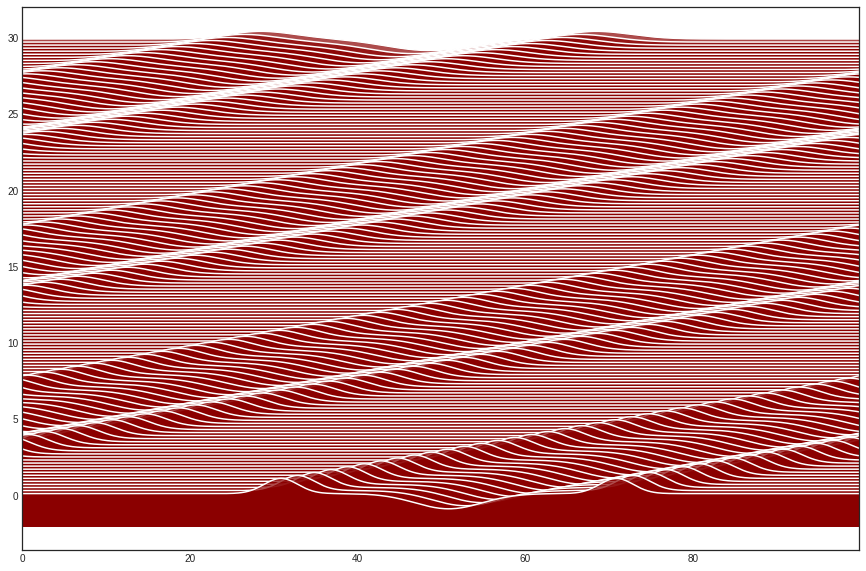

In [12]:
pl.figure(figsize=(15, 10))
for i, (t, fields) in enumerate(simulation):
    if i % 2 == 0:
        pl.fill_between(fields.x, fields.U + .1 * (i + 1),
                        fields.U.min() - 1,
                        color='darkred', zorder=-2 * i, alpha=.7)
        pl.plot(fields.x, fields.U + .1 * (i + 1), 
                color='white',
                zorder=-(2 * i - 1))
    print(f"t: {t:g}".ljust(80), end='\r')
pl.xlim(0, fields.x.max())
pl.show()